<a href="https://colab.research.google.com/github/yosaphatprs/uts-machine-learning-ti3f/blob/main/UTS_JosafatPratamaSusilo_TI3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentasi Gambar dengan Clustering

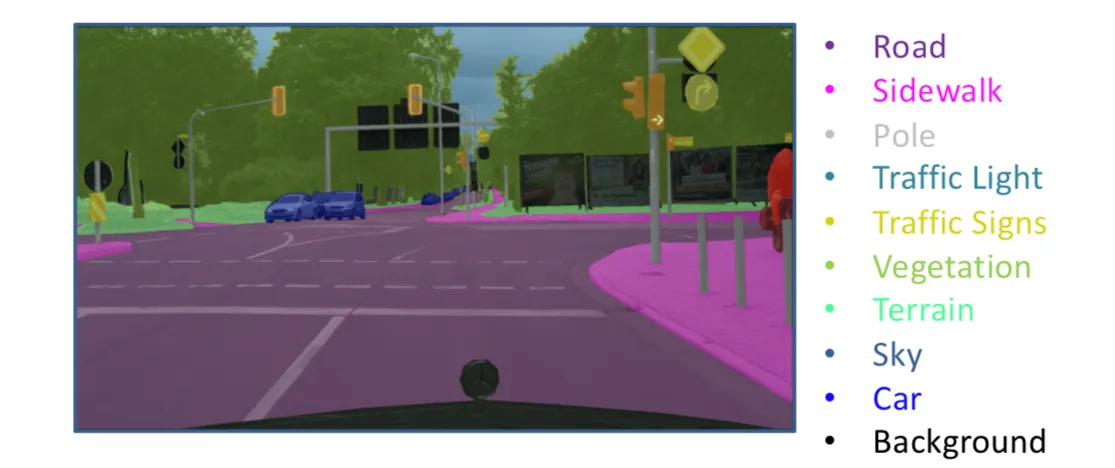

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

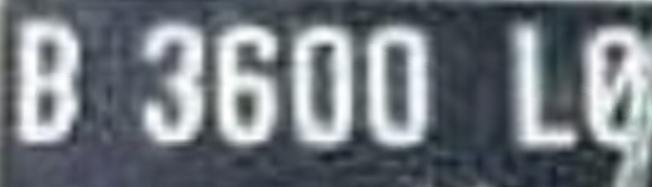

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [1]:
# Import Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
from IPython.utils.path import glob
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import pytesseract
import difflib

In [4]:
cv_img = []
for img in glob.glob('/content/drive/MyDrive/dummy_uts_ml/*.jpg'):
  img_bgr = cv.imread(img)
  img_rgb = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
  cv_img.append(img_rgb)

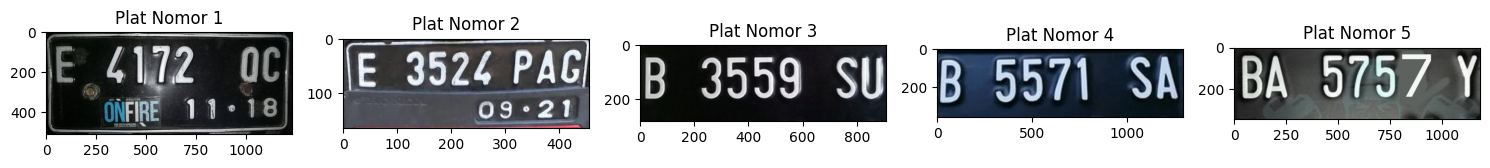

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i < len(cv_img):
        ax.imshow(cv_img[i])
        ax.set_title(f"Plat Nomor {i+1}")
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing

## Membuat fungsi-fungsi untuk memudahkan preprocessing

In [6]:
# Grayscale
def grayscaling(image):
  return cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Threshold
def binary_image(image):
  ret, thresh = cv.threshold(image, 125, 200, cv.THRESH_BINARY)
  return thresh

# Gamma Correction
def gamma_correction(image, gamma):
  gamma_corrected = np.power(image / 255.0, gamma) * 255.0
  gamma_corrected = np.uint8(gamma_corrected)
  return gamma_corrected

# Mengurangi Noise
def noise_reduction(image, size):
  smoothed_image = cv.GaussianBlur(image, (size, size), 0)
  return smoothed_image

# Brightness
def brightness_correction(image):
  thresh = cv.adaptiveThreshold(image, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
  result = cv.bitwise_and(image, image, mask=thresh)
  return result

# Dilation
def dilate(image, ksize):
    kernel = np.ones((ksize,ksize),np.uint8)
    return cv.dilate(image, kernel, iterations = 1)

# Erosion
def erode(image, ksize):
    kernel = np.ones((ksize,ksize),np.uint8)
    return cv.erode(image, kernel, iterations = 1)

## Plat nomor 1

In [7]:
# Reduksi Dimensi untuk crop bagian plat nomor saja
h, w, ch= cv_img[0].shape
print(h)
print(w)
print(ch)

511
1231
3


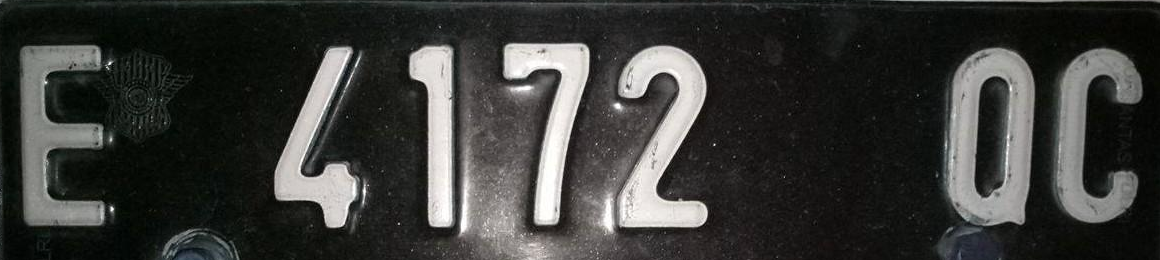

In [8]:
cv_img[0] = cv_img[0][30:290,30:1190]
cv2_imshow(cv_img[0])

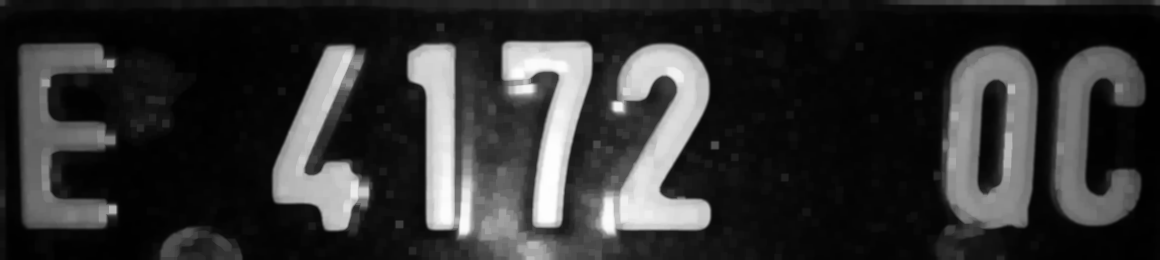

In [9]:
# Preprocessing
grayscale1 = grayscaling(cv_img[0])
gamma1 = gamma_correction(grayscale1, 1.5)
noise1 = noise_reduction(gamma1, 5)
dilate1 = dilate(noise1, 10)
plat1 = erode(dilate1, 5)
cv2_imshow(plat1)

## Plat Nomor 2

In [10]:
# Reduksi Dimensi untuk crop bagian plat nomor saja
h, w, ch= cv_img[1].shape
print(h)
print(w)
print(ch)

165
455
3


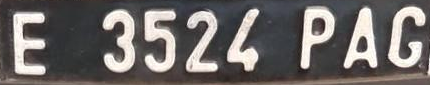

In [11]:
cv_img[1] = cv_img[1][15:100, 15:445]
cv2_imshow(cv_img[1])

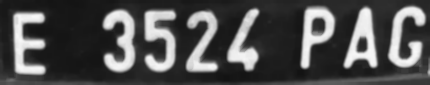

In [12]:
# Preprocessing
grayscale2 = grayscaling(cv_img[1])
gamma2 = gamma_correction(grayscale2, 1.5)
noise2 = noise_reduction(gamma2, 5)
dilate2 = dilate(noise2, 5)
plat2 = erode(dilate2, 5)
cv2_imshow(plat2)

## Plat Nomor 3

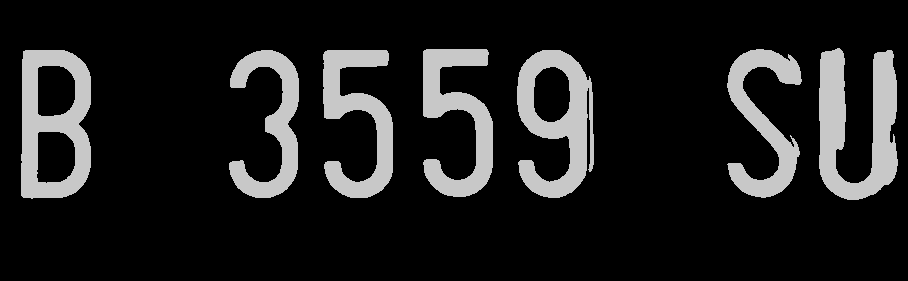

In [13]:
# Preprocessing
grayscale3 = grayscaling(cv_img[2])
gamma3 = gamma_correction(grayscale3, 1.5)
noise3 = noise_reduction(gamma3, 5)
plat3 = binary_image(noise3)
cv2_imshow(plat3)

## Plat Nomor 4

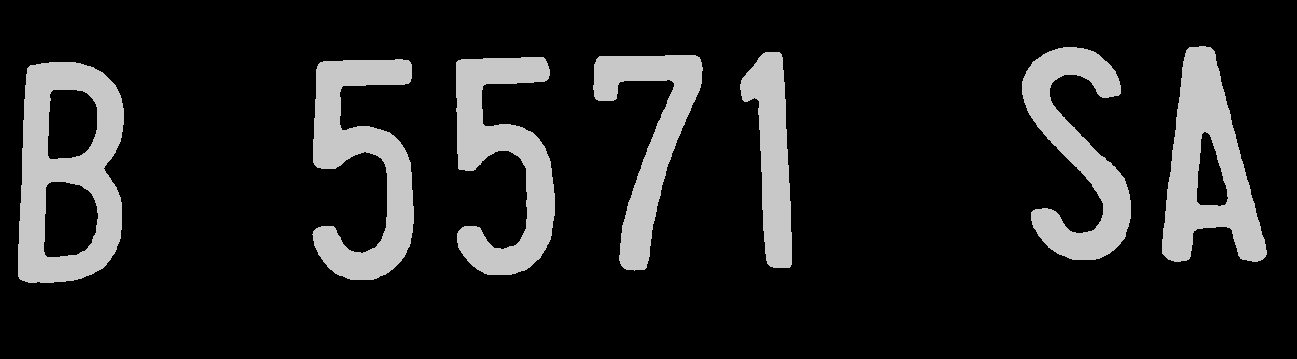

In [14]:
# Preprocessing
grayscale4 = grayscaling(cv_img[3])
gamma4 = gamma_correction(grayscale4, 1.5)
noise4 = noise_reduction(gamma4, 5)
plat4 = binary_image(noise4)
cv2_imshow(plat4)

## Plat Nomor 5

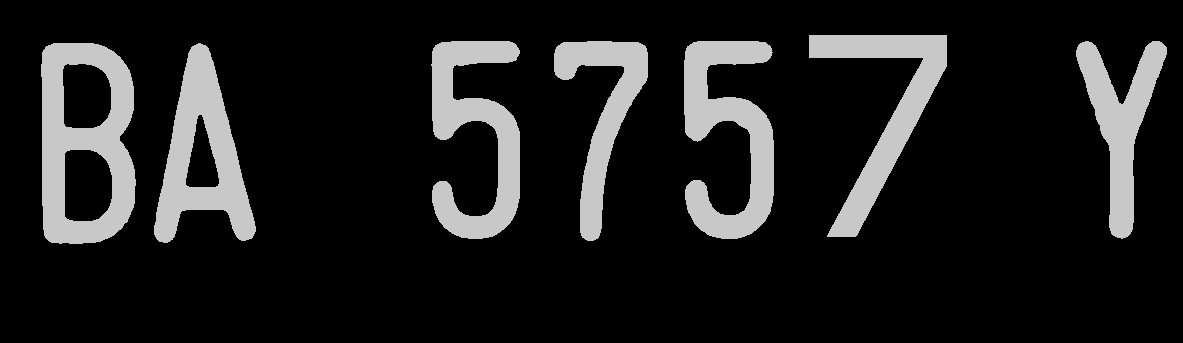

In [15]:
# Preprocessing
grayscale5 = grayscaling(cv_img[4])
gamma5 = gamma_correction(grayscale5, 1.5)
noise5 = noise_reduction(gamma5, 5)
plat5 = binary_image(noise5)
cv2_imshow(plat5)

# Kmeans Clustering

In [16]:
# Show Image
def show_image(original, segmented):
  fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
  fig.subplots_adjust(wspace=0.05)
  ax[0].imshow(original)
  ax[0].set_title('Original Image', size=16)
  ax[1].imshow(cv.cvtColor(segmented, cv.COLOR_BGR2RGB))
  ax[1].set_title('2-color Image', size=16)

In [17]:
# Kmeans
def kmeans_clustering(original, image):
  reshape_img = image.reshape((-1, 1))
  kmeans = KMeans(n_clusters=2, n_init = 10)
  kmeans.fit(reshape_img)

  label_klaster = kmeans.labels_.reshape(image.shape)

  segmented = original.copy()
  segmented[label_klaster == 0] = [0, 0, 0]
  return segmented

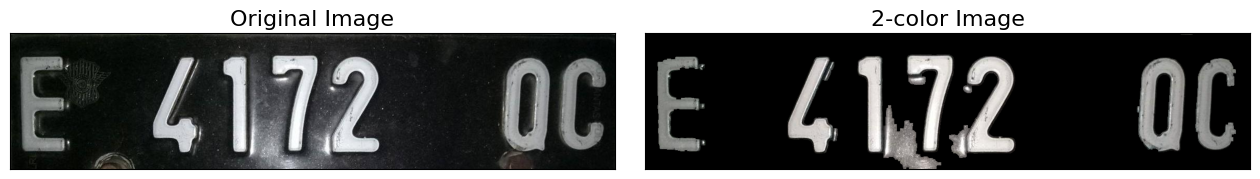

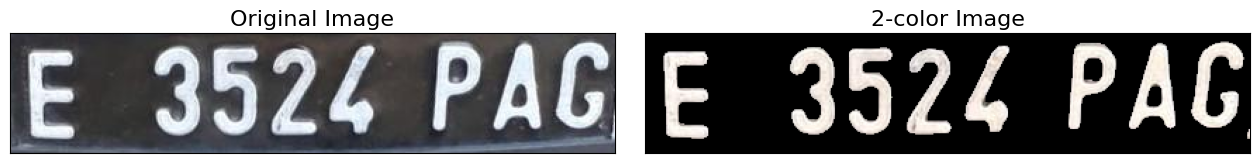

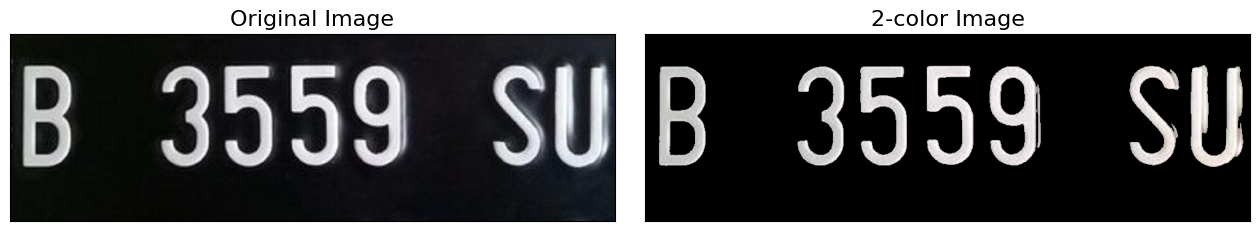

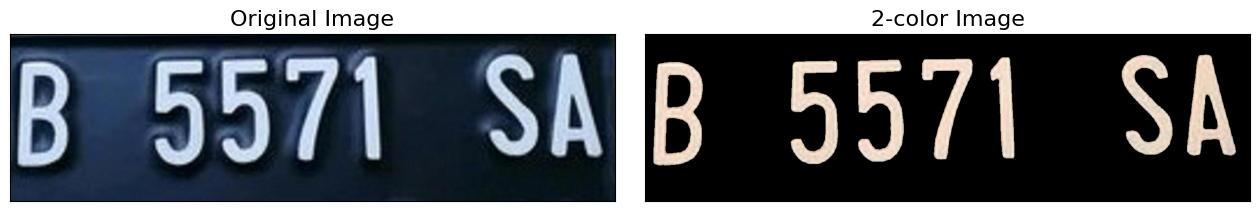

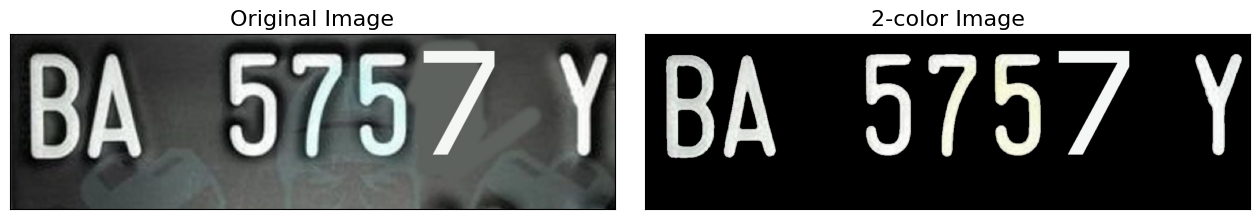

In [18]:
segmented_image = []
segmented_image.append(kmeans_clustering(cv_img[0], plat1))
segmented_image.append(kmeans_clustering(cv_img[1], plat2))
segmented_image.append(kmeans_clustering(cv_img[2], plat3))
segmented_image.append(kmeans_clustering(cv_img[3], plat4))
segmented_image.append(kmeans_clustering(cv_img[4], plat5))

for i in range(5):
  show_image(cv_img[i], segmented_image[i])

# Evaluasi

In [19]:
# Deteksi Contour
def find_contours(image):
    contours, hierarchy = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    return contours

def crop_characters(image, contours):
        counter = 0
        characters = []
        for i in contours:
            x, y, w, h = cv.boundingRect(i)
            cropped = image[y:y + h, x:x + w]
            width, height = cropped.shape[:2]

            if width * height > 200:
                characters.append(cropped)
            counter = counter + 1

        return reversed(characters)

def draw_rect(image,contours):
    for i in contours:
        x, y, w, h = cv.boundingRect(i)
        if (w * h) >= 10:
          cv.rectangle(image, (x, y), (x + w, y + h), (255, 255, 255), 1)
    return image

In [20]:
def evaluate(image):
  gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  contours = find_contours(gray_image)
  cropped_characters = crop_characters(image, contours)

  img_rect = draw_rect(image, contours)
  plt.imshow(cv.cvtColor(img_rect, cv.COLOR_BGR2RGB))
  plt.show()

  print(f"Jumlah Huruf: {len(list(cropped_characters))}")

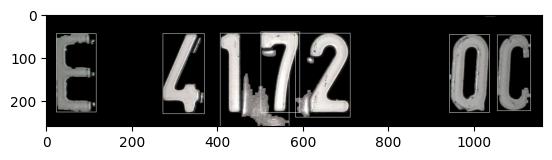

Jumlah Huruf: 7


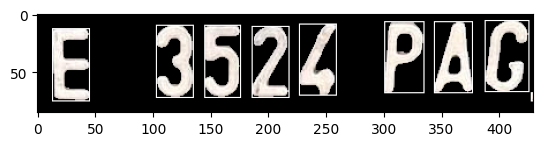

Jumlah Huruf: 8


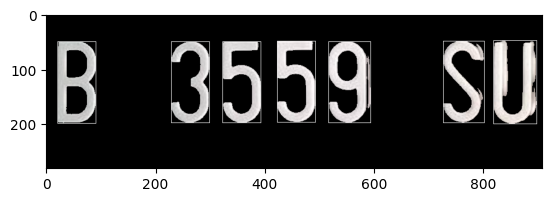

Jumlah Huruf: 7


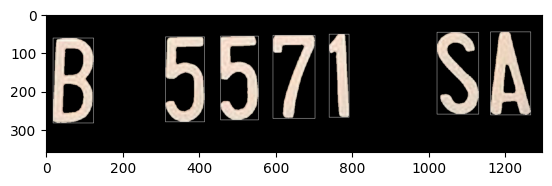

Jumlah Huruf: 7


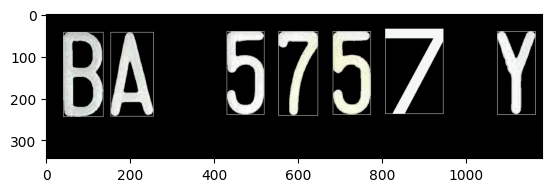

Jumlah Huruf: 7


In [21]:
for i in range(5):
  evaluate(segmented_image[i])

In [22]:
label = ["E 4172 QC", "E 3524 PAG", "B 3559 SU", "B 5571 SA", "BA 5757 Y"]
for i, label_nopol in enumerate(label):
  text = pytesseract.image_to_string(segmented_image[i], lang='eng')
  print(f"Plat nomor {i+1}: {label_nopol}")
  print(f"Hasil OCR: {text}")
  print(f"Tingkat kemiripan: {difflib.SequenceMatcher(None, text.strip(), label_nopol).ratio()}\n\n")

Plat nomor 1: E 4172 QC
Hasil OCR: cay Ve

Tingkat kemiripan: 0.13333333333333333


Plat nomor 2: E 3524 PAG
Hasil OCR: PAG

Tingkat kemiripan: 0.46153846153846156


Plat nomor 3: B 3559 SU
Hasil OCR:  

 

 

 

3999 SU

 

Tingkat kemiripan: 0.625


Plat nomor 4: B 5571 SA
Hasil OCR:  

 

 

 

 

 

 

Tingkat kemiripan: 0.0


Plat nomor 5: BA 5757 Y
Hasil OCR: VA |

 

Tingkat kemiripan: 0.3076923076923077


